# MNIST 손글씨 인식하기: 데이터 전처리


In [70]:
import PIL.Image as pilimg
import numpy as np
 
# Read image
im = pilimg.open(r"C:\Users\pro\Desktop\a.jpg")

 
# Fetch image pixel data to numpy array
pix = np.array(im)
pix = pix/255
pix = pix.mean(-1,axis=2)
np.delete(pix, axis=2)
print(pix).reshape(1, 784).astype("float32")

TypeError: _mean() got multiple values for argument 'axis'

In [18]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import os

## SEED 값 설정

In [2]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

## MNIST 데이터 셋 불러오기

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개"% (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개"% (X_test.shape[0]))


학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


## 차원 변환 과정

In [47]:

X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype("float32")
X_train = X_train/255
X_test = X_test.reshape(X_test.shape[0], 784).astype("float32")/255

60000


## 클래스 값 확인

In [5]:
print("class : %d" % (Y_train[0]))

class : 5


## 바이너리화 과정 (One hot encoding)

In [6]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 딥러닝 기본 프레임 만들기

## 모델 프레임 설정

In [7]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

## 모델 실행 환경 설정

In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## 모델 최적화 설정

In [9]:
MODEL_DIR= './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss: .4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

## 모델의 실행

In [10]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.15397, saving model to ./model/01- 0.1540.hdf5

Epoch 00002: val_loss improved from 0.15397 to 0.10377, saving model to ./model/02- 0.1038.hdf5

Epoch 00003: val_loss improved from 0.10377 to 0.08482, saving model to ./model/03- 0.0848.hdf5

Epoch 00004: val_loss improved from 0.08482 to 0.07667, saving model to ./model/04- 0.0767.hdf5

Epoch 00005: val_loss improved from 0.07667 to 0.06802, saving model to ./model/05- 0.0680.hdf5

Epoch 00006: val_loss improved from 0.06802 to 0.06171, saving model to ./model/06- 0.0617.hdf5

Epoch 00007: val_loss did not improve from 0.06171

Epoch 00008: val_loss improved from 0.06171 to 0.05953, saving model to ./model/08- 0.0595.hdf5

Epoch 00009: val_loss improved from 0.05953 to 0.05721, saving model to ./model/09- 0.0572.hdf5

Epoch 00010: val_loss did not improve from 0.05721

Epoch 00011: val_loss did not improve from 0.05721

Epoch 00012: val_loss did not improve from 0.05721

Epoch 00013: val_lo

## 테스트 정확도 출력

In [11]:
print("\n Test Accuracy; %.4f"% (model.evaluate(X_test,Y_test)[1]))

10000/10000 [==============================] - 1s 93us/step

 Test Accuracy; 0.9825


## 테스트셋의 오차와 학습셋의 오차

In [12]:
y_vloss = history.history['val_loss']
y_loss= history.history['loss']

## 그래프로 표현

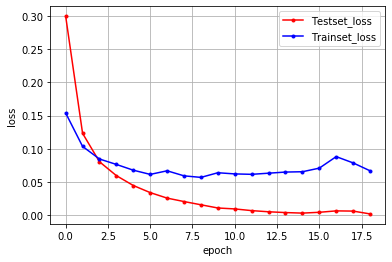

In [13]:
x_len =numpy.arange(len(y_loss))
plt.plot(x_len,y_loss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len,y_vloss, marker=".", c="Blue", label='Trainset_loss')

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)

print('\n테스트 정확도:', test_acc)


테스트 정확도: 0.9825000166893005


## 예측 만들기

In [45]:
predictions = model.predict(pix)
predictions[0]

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (591, 591, 3)

## 가장 높은 신뢰도

In [19]:
np.argmax(predictions[0])

7

In [22]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)